In [13]:
import pandas as pd
df = pd.read_csv('Car name.csv')
print(df.head())
car_attributes_df = pd.read_json('Car-Attributes.json')
print(car_attributes_df.head())
merged_df = df.merge(car_attributes_df,left_index=True,right_index=True)
print("printing 5 point summary of the numerical features \n\n",merged_df.describe())
print(merged_df.head())

                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino
    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1
printing 5 point summary of the numerical features 

               mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   1

Central Tendencies:

mpg: The average fuel efficiency is 23.5 mpg, suggesting a mix of fuel-efficient and less-efficient cars.
cyl: The median cylinder count is 4, indicating a tendency towards 4-cylinder engines.
disp: The median displacement is 148.5 cubic inches, suggesting a range of engine sizes.
wt: The median weight is 2804 pounds, reflecting a variety of car sizes.
acc: The median acceleration is 15.5 seconds, implying a range of acceleration capabilities.
yr: The median year is 1976, indicating data from a specific time period.
origin: The median origin is 1, suggesting a predominance of cars from a particular region

Spread and Variability:

mpg: The standard deviation of 7.8 mpg indicates significant variation in fuel efficiency.
cyl: The interquartile range (IQR) of 4 cylinders suggests a mix of 4-cylinder and 8-cylinder cars.
disp: The wide range of displacement (68 to 455 cubic inches) reflects diverse engine types.
wt: The large weight range (1613 to 5140 pounds) indicates a variety of car sizes and classes.

Potential Outliers:

mpg: Values below 15.5 mpg or above 32.5 mpg might be considered outliers.
wt: Cars weighing less than 1967 pounds or more than 4451 pounds could be potential outliers.
Additional Considerations for Assignment:



In [19]:
import numpy as np

merged_df.replace('?', np.nan, inplace=True)
merged_df.replace('', np.nan, inplace=True)
merged_df.replace('NA', np.nan, inplace=True)

In [20]:
missing_values = pd.DataFrame(merged_df.isnull().sum() / len(merged_df) * 100, columns=['Percentage Missing'])
print(missing_values)

          Percentage Missing
car_name            0.000000
mpg                 0.000000
cyl                 0.000000
disp                0.000000
hp                  1.507538
wt                  0.000000
acc                 0.000000
yr                  0.000000
origin              0.000000


In [21]:
mean_hp = merged_df['hp'].mean()
merged_df['hp'].fillna(mean_hp, inplace=True)

In [22]:
missing_values = pd.DataFrame(merged_df.isnull().sum() / len(merged_df) * 100, columns=['Percentage Missing'])
print(missing_values)

          Percentage Missing
car_name                 0.0
mpg                      0.0
cyl                      0.0
disp                     0.0
hp                       0.0
wt                       0.0
acc                      0.0
yr                       0.0
origin                   0.0


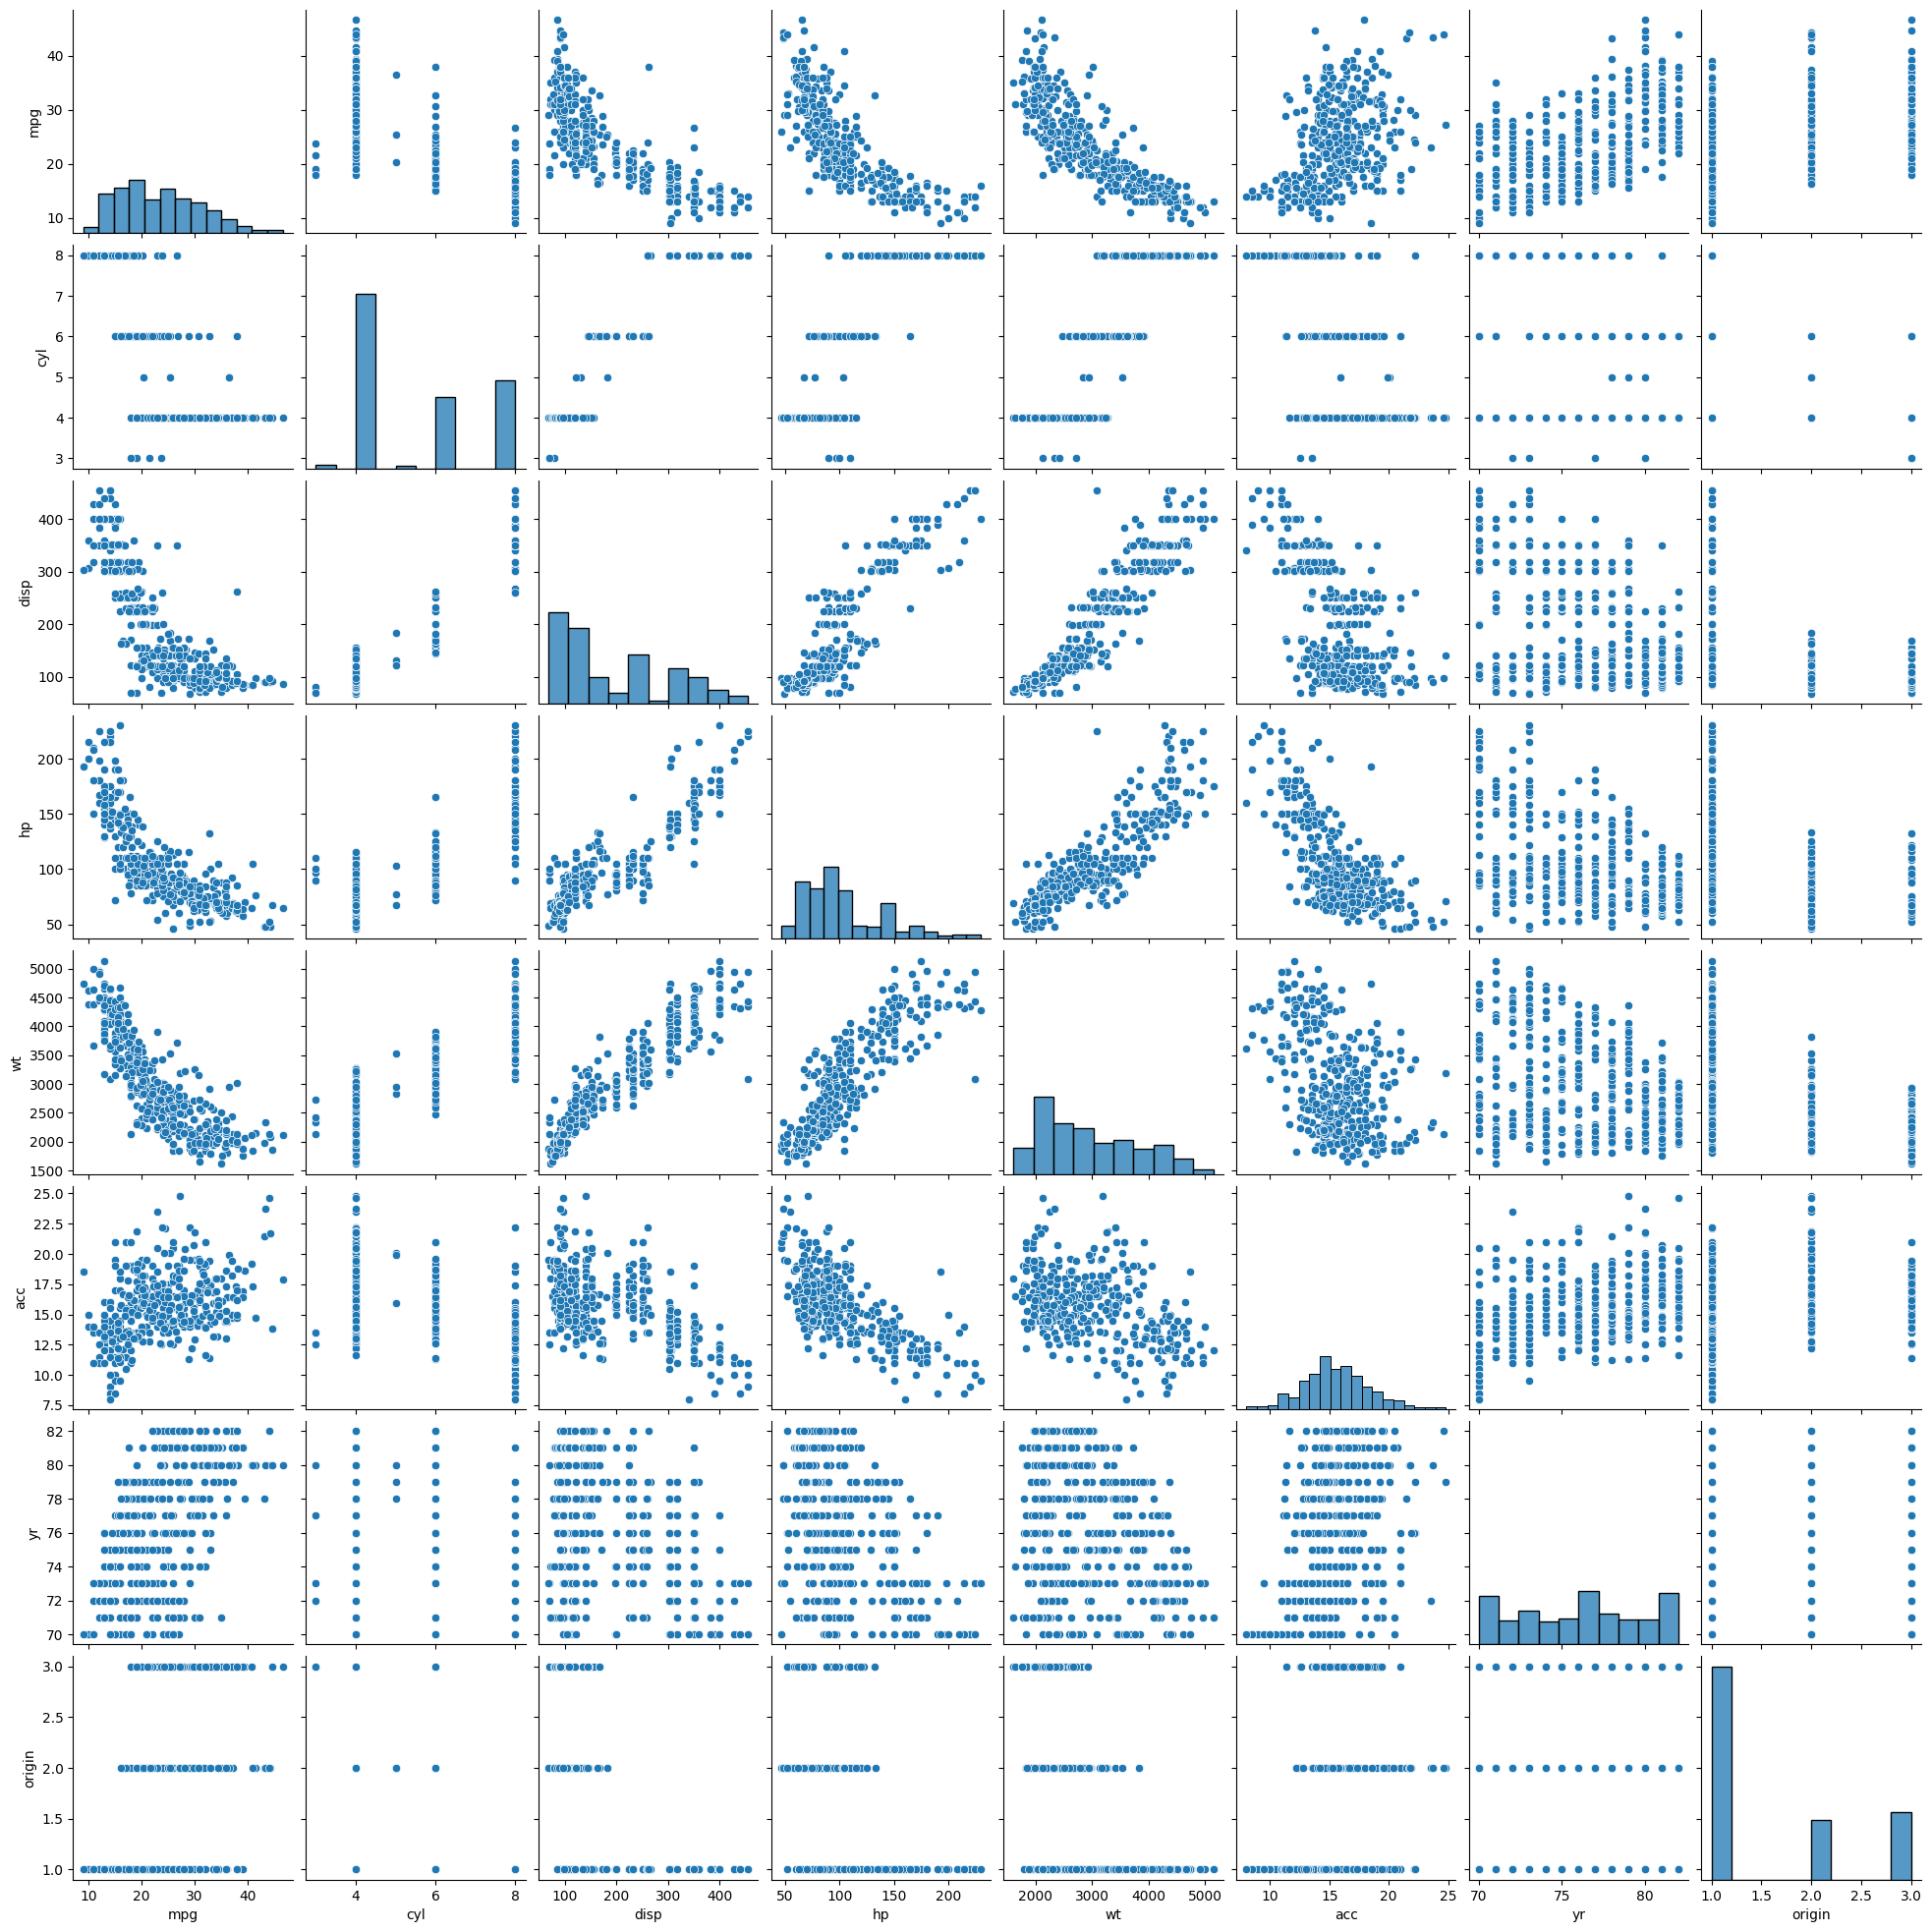

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(merged_df)
plt.show()


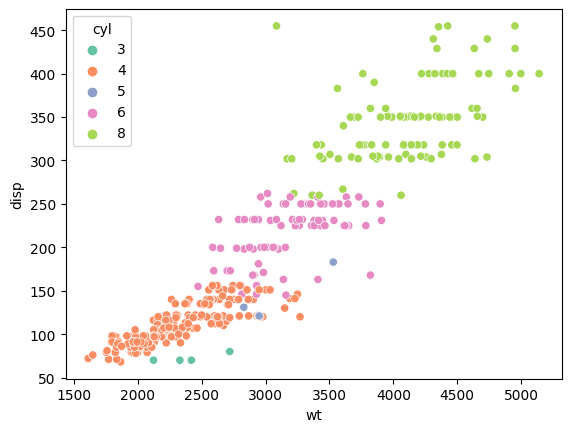

In [25]:

sns.scatterplot(x='wt', y='disp', data=merged_df, hue='cyl', palette='Set2')
plt.show()


As we can see from the above picture it is safe to assume that cars with similar number of cylinders share similar weight and displacement values. Also the number of cylinders seem to show a direct correlation eith weight and displacement but for similar cylinder values, weight and diplacement dont seem to have a strong relation.


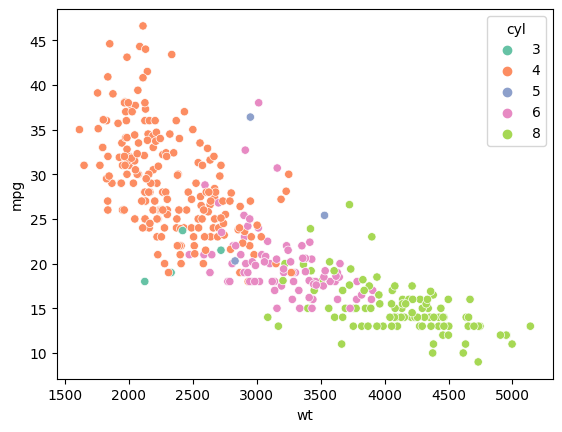

In [26]:

sns.scatterplot(x='wt', y='mpg', data=merged_df, hue='cyl', palette='Set2')
plt.show()


Mileage seems to show an inversely propotional relation with number of cylinders, give number of cylinders is more than or equal to 4. As the plot shows cars with number of cylinders 3 have higher weight and lesser milage compared with cars with cylinder count as 4 or 5 also in some cases.

As the weight increases the mileage has shown a decrease, but a lesser impact is seen when number of cylinders remain same. This change in mileage with weight is prominent when number of cylinders is less(4-6), but not so much when numer of cylinders is hight like 8.

In [27]:
unique_values_per_column = merged_df.apply(pd.Series.unique)
print(unique_values_per_column)


car_name    [chevrolet chevelle malibu, buick skylark 320,...
mpg         [18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21....
cyl                                           [8, 4, 6, 3, 5]
disp        [307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454...
hp          [130.0, 165.0, 150.0, 140.0, 198.0, 220.0, 215...
wt          [3504, 3693, 3436, 3433, 3449, 4341, 4354, 431...
acc         [12.0, 11.5, 11.0, 10.5, 10.0, 9.0, 8.5, 8.0, ...
yr          [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...
origin                                              [1, 3, 2]
dtype: object


In [28]:
merged_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


array([[<Axes: title={'center': 'mpg'}>, <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'disp'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'wt'}>,
        <Axes: title={'center': 'acc'}>],
       [<Axes: title={'center': 'yr'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

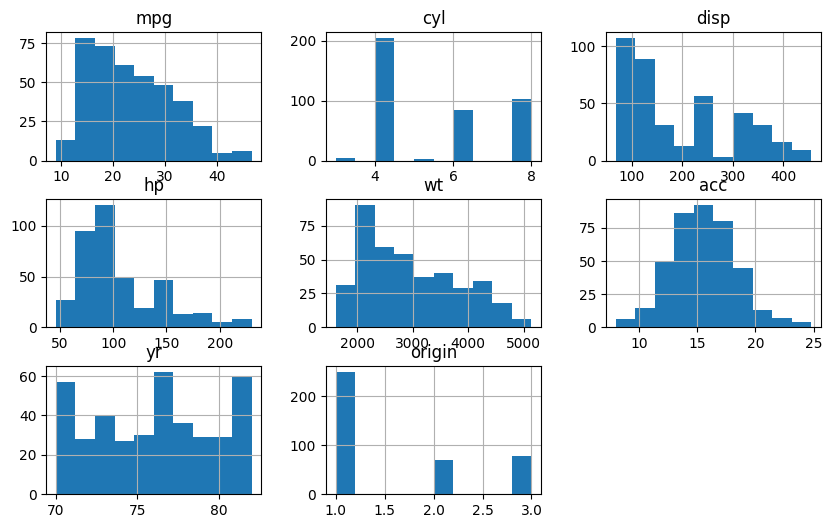

In [29]:
merged_df.hist(figsize=(10, 6))

The description of the merged dataframe doesn;t show any unusual statistics and even the histograms seem clean. The null representing characters have already been handeled in cell 19


In [30]:
from sklearn.cluster import KMeans
def apply_kmeans_and_plot_elbow(data):

    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

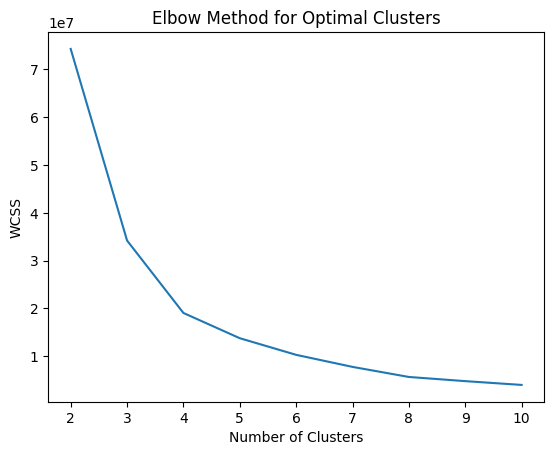

In [34]:
#remove categorical value from merged_df
merged_df_att=merged_df.drop('car_name',axis=1)
apply_kmeans_and_plot_elbow(merged_df_att)

The possible elbow points for the above data are 4 and 8. There is an elbow at 3 too but there is a significant improvement from 3 to 4 so might not be the best option

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(merged_df_att)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

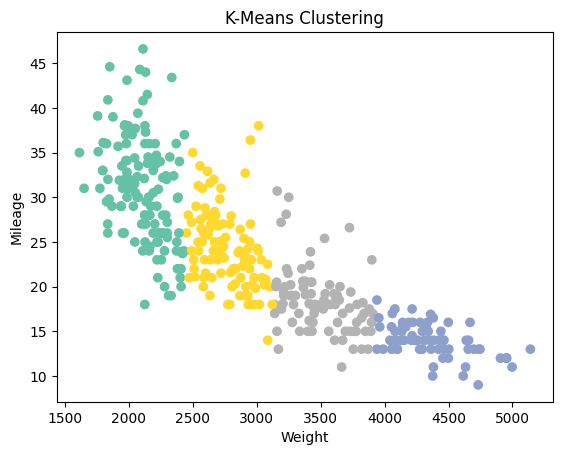

In [36]:

plt.scatter(merged_df_att['wt'], merged_df_att['mpg'], c=kmeans.labels_, cmap='Set2')
plt.xlabel('Weight')
plt.ylabel('Mileage')
plt.title('K-Means Clustering')
plt.show()


In [42]:

merged_df['cluster_label'] = kmeans.labels_
print(merged_df.head())

                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_label  
0              3  
1              3  
2              3  
3              3  
4              3  


                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   cluster_label  
0              3  
1              3  
2              3  
3              3  
4              3  


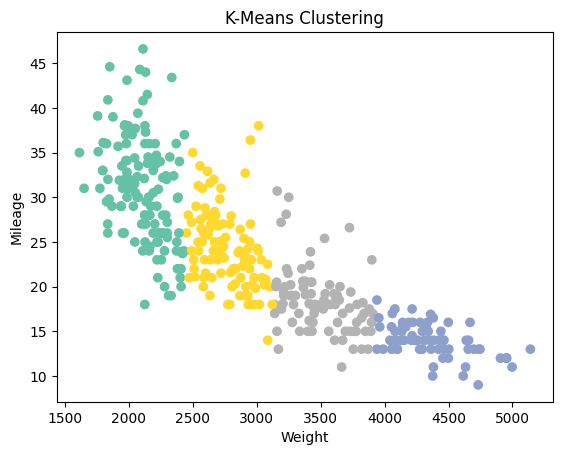

In [45]:

merged_df['cluster_label'] = kmeans.labels_
print(merged_df.head())

plt.scatter(merged_df['wt'], merged_df['mpg'], c=merged_df['cluster_label'], cmap='Set2')
plt.xlabel('Weight')
plt.ylabel('Mileage')
plt.title('K-Means Clustering')
plt.show()


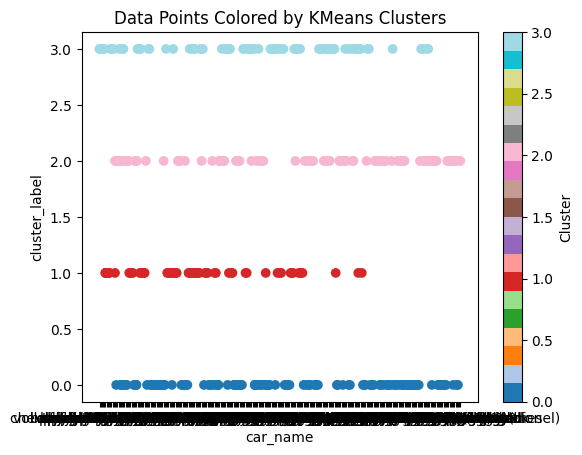

In [44]:
plt.scatter(merged_df['car_name'], merged_df['cluster_label'],c=kmeans.labels_, cmap='tab20')
plt.colorbar(label='Cluster')
plt.xlabel('car_name')
plt.ylabel('cluster_label')
plt.title('Data Points Colored by KMeans Clusters')
plt.show()

In [49]:

new_data = { 'mpg': 20, 'cyl': 8,'disp' : 300,'hp' : 145,'wt': 2700,'acc': 13,'yr':70,'origin':1}
new_data_df = pd.DataFrame(new_data, index=[0])
print(new_data_df)

new_data_df['cluster_label'] = kmeans.predict(new_data_df)
print(new_data_df)


   mpg  cyl  disp   hp    wt  acc  yr  origin
0   20    8   300  145  2700   13  70       1
   mpg  cyl  disp   hp    wt  acc  yr  origin  cluster_label
0   20    8   300  145  2700   13  70       1              2


# Module -2


In [50]:

df = pd.read_csv('vehicle.csv')
df.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [51]:

missing_values = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['Percentage Missing'])
print(missing_values)
mean_hp = df.mean()
df.fillna(mean_hp, inplace=True)
missing_values = pd.DataFrame(df.isnull().sum() / len(df) * 100, columns=['Percentage Missing'])
print(missing_values)


                             Percentage Missing
compactness                            0.000000
circularity                            0.591017
distance_circularity                   0.472813
radius_ratio                           0.709220
pr.axis_aspect_ratio                   0.236407
max.length_aspect_ratio                0.000000
scatter_ratio                          0.118203
elongatedness                          0.118203
pr.axis_rectangularity                 0.354610
max.length_rectangularity              0.000000
scaled_variance                        0.354610
scaled_variance.1                      0.236407
scaled_radius_of_gyration              0.236407
scaled_radius_of_gyration.1            0.472813
skewness_about                         0.709220
skewness_about.1                       0.118203
skewness_about.2                       0.118203
hollows_ratio                          0.000000
class                                  0.000000
                             Percentage 

<ipython-input-51-6902a5975a80>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_hp = df.mean()


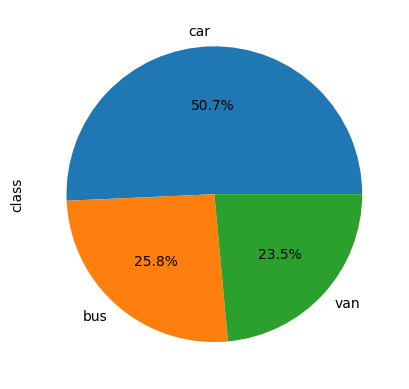

In [52]:
df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()


In [53]:

print(df.duplicated().sum())
df['duplicate'] = df.duplicated()
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0
0


In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [63]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [65]:

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_scaled, y_train_scaled)


SVC(kernel='linear')

In [67]:

y_pred = svm_model.predict(X_train_scaled)

print(classification_report(y_train, y_pred))

print(confusion_matrix(y_train, y_pred))


              precision    recall  f1-score   support

         bus       0.94      0.95      0.94       140
         car       0.97      0.97      0.97       311
         van       0.97      0.97      0.97       141

    accuracy                           0.96       592
   macro avg       0.96      0.96      0.96       592
weighted avg       0.96      0.96      0.96       592

[[133   6   1]
 [  7 301   3]
 [  2   2 137]]


[[ 2.74916263e-01  2.93604142e-01  3.09476256e-01  2.77533257e-01
   9.22816020e-02  1.06308675e-01  3.10594960e-01 -3.14198963e-01
   3.06916568e-01  2.84909522e-01  3.05453460e-01  3.06023653e-01
   2.64703760e-01 -4.17804300e-02  3.33932064e-02  5.57591635e-02
   4.85190824e-02  9.84594540e-02  0.00000000e+00]
 [-1.29141206e-01  1.35343375e-01 -5.97173430e-02 -1.43359368e-01
  -4.10402042e-02  1.06612144e-01  4.51825588e-02  1.37990312e-02
   5.77788224e-02  1.25292391e-01  7.78684848e-02  4.83867465e-02
   2.01519690e-01  5.24826679e-01 -7.66358767e-02 -1.21808302e-01
  -5.40819273e-01 -5.18569125e-01 -0.00000000e+00]
 [-9.24203049e-02 -6.54999244e-02 -5.48718289e-02  2.79856262e-01
   6.29127022e-01  5.95813859e-01 -1.05384945e-01  5.76351696e-02
  -1.20957597e-01 -6.49587347e-02  7.08839666e-02 -1.13421381e-01
  -6.73054818e-02  2.53398745e-01 -8.38866225e-02 -5.77547406e-02
   1.07993688e-01  1.14453265e-01 -0.00000000e+00]
 [ 6.14819953e-02  1.91196224e-01 -7.80131112e-02 -4.60

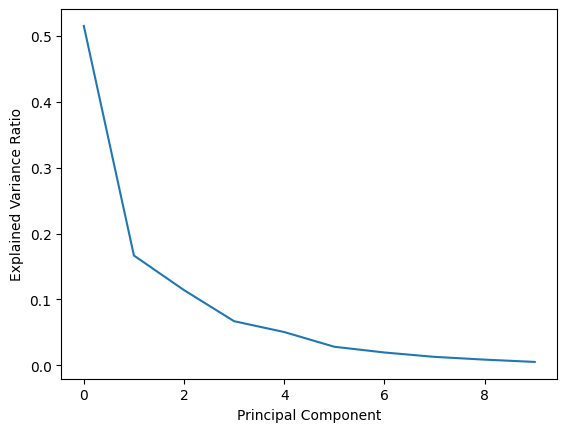

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
data_pca = pca.transform(X_train_scaled)
principal_components = pca.components_
print(principal_components)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


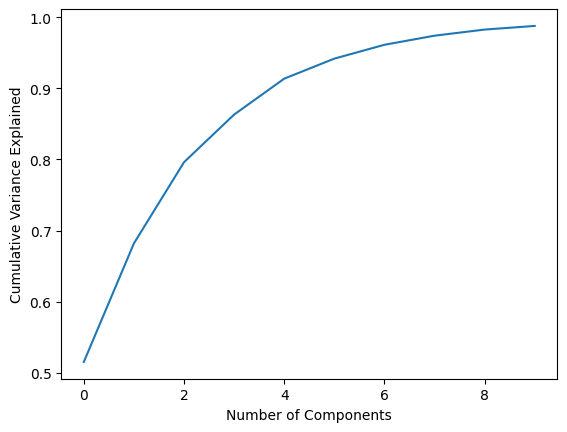

In [70]:

cumulative_variance_explained = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()


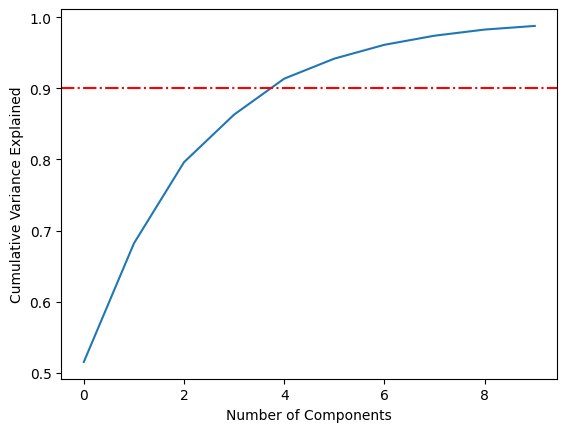

In [73]:
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='dashdot')
plt.show()


In [77]:
min_components = np.argmax(cumulative_variance_explained >= 0.9) + 1
pca = PCA(n_components=min_components)
data_pca = pca.fit_transform(X)

In [78]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(data_pca, y, test_size=0.3, random_state=42)

In [79]:
svm_model.fit(X_train_red, y_train_red)

SVC(kernel='linear')

In [81]:
y_pred = svm_model.predict(X_test_red)
print(classification_report(y_test_red, y_pred))
print(confusion_matrix(y_test_red, y_pred))

              precision    recall  f1-score   support

         bus       0.54      0.49      0.51        78
         car       0.69      0.81      0.74       118
         van       0.59      0.45      0.51        58

    accuracy                           0.63       254
   macro avg       0.61      0.58      0.59       254
weighted avg       0.62      0.63      0.62       254

[[38 32  8]
 [12 96 10]
 [20 12 26]]



Accuracy: 63% (moderate performance)

Macro F1-score: 59% (indicates room for improvement across classes)

Weighted F1-score: 62% (slightly better than macro due to class imbalance)


Bus: Precision 0.54, Recall 0.49, F1-score 0.51 (struggles with both precision and recall)

Car: Precision 0.69, Recall 0.81, F1-score 0.74 (relatively better, but recall could be improved)

Van: Precision 0.59, Recall 0.45, F1-score 0.51 (similar struggles as bus)

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
pca = PCA(n_components=0.90)
data_pca_2 = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.3, random_state=42)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         bus       0.82      0.65      0.73        78
         car       0.79      0.89      0.84       118
         van       0.69      0.71      0.70        58

    accuracy                           0.78       254
   macro avg       0.77      0.75      0.76       254
weighted avg       0.78      0.78      0.77       254

[[ 51  19   8]
 [  3 105  10]
 [  8   9  41]]


In [85]:
best_params = grid_search.best_params_
print(best_params)


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Model        	                            Accuracy	Macro F1-score	Weighted F1-score


Model 1 (High-performing)	96%	96%	96%

Model 2 (PCA + SVM)	63%	59%	62%

Model 3 (Comparison)	78%	76%	77%

Model 1 significantly outperforms both Model 2 and Model 3 in terms of overall accuracy and F1-scores.
Model 2 exhibits the lowest performance, suggesting potential difficulties with feature representation or model complexity.
Model 3 performs better than Model 2 but falls short of Model 1. It potentially provides a good balance between accuracy and complexity compared to Model 1.

Model 2 achieves consistently high precision and recall across all classes.
Model 3 shows weaker performance for the "bus" class with lower recall compared to the other models.
While Model 1 results are not provided for this comparison, previous analysis indicated struggles with both precision and recall for all classes.
Insights:

Model 1 Appears to be the most robust and accurate model based on the available metrics. Its high performance across all classes makes it a strong candidate for your specific task.

Model 3 Offers a potentially good balance between accuracy and complexity with decent performance across classes. However, it might not be the best choice if absolute accuracy or specific class-level performance is crucial.


# Question Answers


## Pre-requisites/Assumptions

Numeric data: PCA operates on numerical data represented as vectors. Categorical variables need encoding or conversion to numerical values.

Linear relationships: PCA assumes underlying linear relationships between features. Nonlinear relationships might not be captured effectively.

Centered data: Ideally, data should be centered (mean subtracted) to ensure equal contribution from each feature.



## Advantages and limitations

Advantages of PCA:


Dimensionality reduction: Reduces the number of features, simplifying tasks like visualization, model training, and interpretation.

Noise reduction: Captures the variance explained by the most significant components, potentially eliminating unimportant noise and improving model performance.

Improved visualization: Simplifies high-dimensional data for clear visualization and exploration of relationships between features.


Multicollinearity mitigation: Addresses correlated features by representing them in fewer, uncorrelated components, improving model stability and interpretability.


Faster algorithms: Reduces computational complexity in some algorithms due to lower dimensionality, leading to faster training and evaluation.


Limitations of PCA:

Loss of information: Reduces data to a lower-dimensional subspace, potentially discarding irrelevant but potentially informative details.

Linearity assumption: Assumes underlying linear relationships between features, potentially failing to capture non-linear patterns.

Choice of components: Determining the optimal number of components can be challenging, with too few losing information and too many introducing noise.


Not suited for all tasks: Not effective for tasks requiring feature-specific information or where all features are equally important.